<a href="https://colab.research.google.com/github/ilmahamala/Heart-Disease-Modelling/blob/main/SC62414_Ilma_Hamala_Nur_Faiza_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
# Base library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.utils import resample

# Others
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [ ]:
# Import Dataset
df = pd.read_csv('/content/heart_datapreprocessing.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,risk_category,age_category,exercise_intensity,Trestbps_category,chol_category,AgeSex_risk,Thalach_condition,Thalach&trestecg_risk,slope&thalach_risk,exercise_heart_response
0,52,1,0,125,212,0,1,168,0,1.0,...,Sedang,Dewasa,1,Prehipertensi,normal,high,normal,Y,tinggi,abnormal
1,53,1,0,140,203,1,0,155,1,3.1,...,Rendah,Pra lanjut usia,1,Hipertensi,normal,high,normal,N,rendah,abnormal
2,70,1,0,145,174,0,1,125,1,2.6,...,Rendah,Lansia,0,Hipertensi,normal,low,normal,Y,rendah,abnormal
3,61,1,0,148,203,0,1,161,0,0.0,...,Sedang,Lansia,1,Hipertensi,normal,low,abnormal,Y,tinggi,normal
4,62,0,0,138,294,1,1,106,0,1.9,...,Rendah,Lansia,0,Hipertensi,high,low,abnormal,Y,rendah,abnormal


### Label encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      283 non-null    int64  
 1   sex                      283 non-null    int64  
 2   cp                       283 non-null    int64  
 3   trestbps                 283 non-null    int64  
 4   chol                     283 non-null    int64  
 5   fbs                      283 non-null    int64  
 6   restecg                  283 non-null    int64  
 7   thalach                  283 non-null    int64  
 8   exang                    283 non-null    int64  
 9   oldpeak                  283 non-null    float64
 10  slope                    283 non-null    int64  
 11  ca                       283 non-null    int64  
 12  thal                     283 non-null    int64  
 13  target                   283 non-null    int64  
 14  risk_cp                  2

In [ ]:
encoder = LabelEncoder()
categorical_features = ['risk_category','age_category','Trestbps_category','chol_category','AgeSex_risk','Thalach_condition','Thalach&trestecg_risk','slope&thalach_risk','exercise_heart_response']

for col in categorical_features:
  df[col] = encoder.fit_transform(df[col])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,risk_category,age_category,exercise_intensity,Trestbps_category,chol_category,AgeSex_risk,Thalach_condition,Thalach&trestecg_risk,slope&thalach_risk,exercise_heart_response
0,0.479167,1.0,0.000000,0.407895,0.367521,0.0,0.5,0.701754,0.0,0.250,...,1,0,1.0,2,1,0,1,1,1,0
1,0.500000,1.0,0.000000,0.605263,0.329060,1.0,0.0,0.587719,1.0,0.775,...,0,2,1.0,0,1,0,1,0,0,0
2,0.854167,1.0,0.000000,0.671053,0.205128,0.0,0.5,0.324561,1.0,0.650,...,0,1,0.0,0,1,1,1,1,0,0
3,0.666667,1.0,0.000000,0.710526,0.329060,0.0,0.5,0.640351,0.0,0.000,...,1,1,1.0,0,1,1,0,1,1,1
4,0.687500,0.0,0.000000,0.578947,0.717949,1.0,0.5,0.157895,0.0,0.475,...,0,1,0.0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.812500,0.0,0.666667,0.342105,0.363248,0.0,0.0,0.236842,0.0,0.375,...,0,1,0.0,2,1,1,0,1,0,0
279,0.312500,0.0,0.666667,0.184211,0.064103,0.0,0.5,0.763158,0.0,0.150,...,1,3,1.0,1,1,0,1,1,0,1
280,0.479167,1.0,0.000000,0.447368,0.551282,0.0,0.5,0.640351,1.0,0.000,...,1,0,1.0,2,0,0,1,1,1,1
281,0.625000,1.0,1.000000,0.868421,0.628205,0.0,0.0,0.324561,0.0,0.000,...,1,2,0.0,0,0,0,0,1,1,1


***
Standar Scaler
***

In [ ]:
#numerical_features = df.select_dtypes(include=['number']).columns.tolist()
#df = minmax_scaling(df, columns=numerical_features)
#df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,risk_category,age_category,exercise_intensity,Trestbps_category,chol_category,AgeSex_risk,Thalach_condition,Thalach&trestecg_risk,slope&thalach_risk,exercise_heart_response
0,0.479167,1.0,0.000000,0.407895,0.367521,0.0,0.5,0.701754,0.0,0.250,...,0.5,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,0.500000,1.0,0.000000,0.605263,0.329060,1.0,0.0,0.587719,1.0,0.775,...,0.0,0.666667,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.854167,1.0,0.000000,0.671053,0.205128,0.0,0.5,0.324561,1.0,0.650,...,0.0,0.333333,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,0.666667,1.0,0.000000,0.710526,0.329060,0.0,0.5,0.640351,0.0,0.000,...,0.5,0.333333,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,0.687500,0.0,0.000000,0.578947,0.717949,1.0,0.5,0.157895,0.0,0.475,...,0.0,0.333333,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0.812500,0.0,0.666667,0.342105,0.363248,0.0,0.0,0.236842,0.0,0.375,...,0.0,0.333333,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
279,0.312500,0.0,0.666667,0.184211,0.064103,0.0,0.5,0.763158,0.0,0.150,...,0.5,1.000000,1.0,0.5,1.0,0.0,1.0,1.0,0.0,1.0
280,0.479167,1.0,0.000000,0.447368,0.551282,0.0,0.5,0.640351,1.0,0.000,...,0.5,0.000000,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
281,0.625000,1.0,1.000000,0.868421,0.628205,0.0,0.0,0.324561,0.0,0.000,...,0.5,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


### Data Splitting

In [ ]:
# Split data
X = df.drop("target", axis=1)
y = df["target"]

# Membagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Fitting

In [ ]:
# Definisikan model
lr = LogisticRegression()

# Latih model
lr.fit(X_train, y_train)

# Prediksi
predictions = lr.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

# Cetak hasil akurasi
print(f"Akurasi Logistic Regression: {accuracy}")

Akurasi Logistic Regression: 0.8245614035087719


In [ ]:
# Definisikan model
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model
knn.fit(X_train, y_train)

# Prediksi
predictions = knn.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

# Cetak hasil akurasi
print(f"Akurasi KNN: {accuracy}")

Akurasi KNN: 0.7719298245614035


In [ ]:
# Definisikan model
dt = DecisionTreeClassifier()

# Latih model
dt.fit(X_train, y_train)

# Prediksi
predictions = dt.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

# Cetak hasil akurasi
print(f"Akurasi Decision Tree: {accuracy}")

Akurasi Decision Tree: 0.7368421052631579


In [ ]:
# Definisikan model
adb = AdaBoostClassifier(n_estimators=100, random_state=42)

# Latih model
adb.fit(X_train, y_train)

# Prediksi
predictions = adb.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

# Cetak hasil akurasi
print(f"Akurasi AdaBoost: {accuracy}")

Akurasi AdaBoost: 0.7894736842105263


In [ ]:
# Definisikan model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf.fit(X_train, y_train)

# Prediksi
predictions = rf.predict(X_test)

# Hitung dan cetak akurasi
accuracy = accuracy_score(y_test, predictions)
print(f"Akurasi: {accuracy}")

Akurasi: 0.8421052631578947


In [ ]:
# Definisikan model

svm = SVC()

# Latih model
svm.fit(X_train, y_train)

# Prediksi
predictions = svm.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)

# Cetak hasil akurasi
print(f"Akurasi: {accuracy}")


Akurasi: 0.8245614035087719


### Cross-Validation dan Learning Curves

***
**Logistic Regression**
***

Logistic Regression cross-validation scores: [0.76086957 0.77777778 0.86666667 0.77777778 0.73333333]
Logistic Regression mean cross-validation scores: 0.7832850241545894


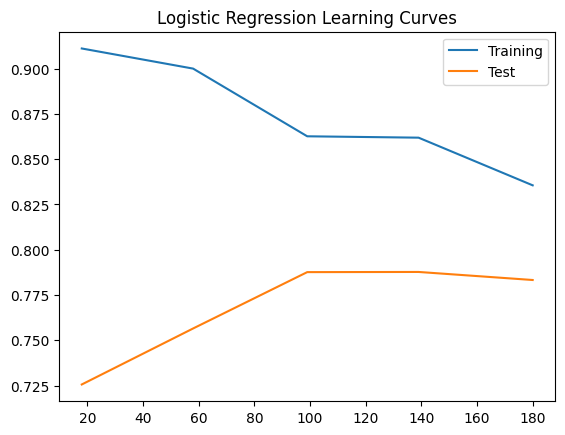

In [ ]:
# mendefinisikan model
#Logistic_Regression =  LogisticRegression()

# cross validation
lr_crossval = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Logistic Regression cross-validation scores: {lr_crossval}")
print(f"Logistic Regression mean cross-validation scores: {np.mean(lr_crossval)}")

# learning curves
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title('Logistic Regression Learning Curves')
plt.legend()
plt.show()

penjelasan learning curve:

***
**KNN**
***

KNN cross-validation scores: [0.7173913  0.75555556 0.71111111 0.8        0.77777778]
KNN mean cross-validation scores: 0.7523671497584541


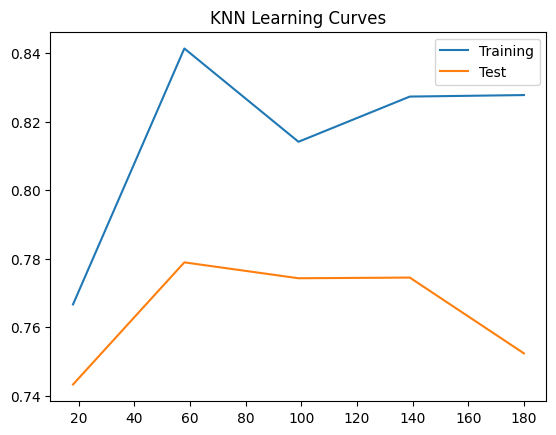

In [ ]:
# mendefinisikan model
#KNN = KNeighborsClassifier(n_neighbors=5)

# cross-validation
knn_crossval = cross_val_score(knn, X_train, y_train, cv=5)
print(f"KNN cross-validation scores: {knn_crossval}")
print(f"KNN mean cross-validation scores: {np.mean(knn_crossval)}")

# learning curves
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title('KNN Learning Curves')
plt.legend()
plt.show()

***
**Decision Tree**
***

Decision Tree cross-validation scores: [0.73913043 0.84444444 0.71111111 0.77777778 0.82222222]
Decision Tree mean cross-validation scores: 0.7789371980676328


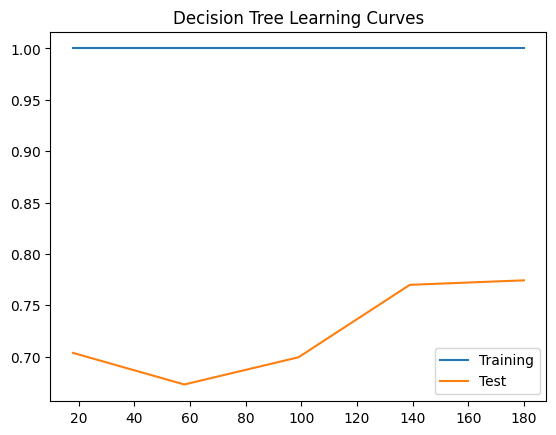

In [ ]:
# mendefinisikan model
#Decision_Tree =  DecisionTreeClassifier(max_depth=3)

# cross validation
dt_crossval = cross_val_score(dt, X_train, y_train, cv=5)
print(f"Decision Tree cross-validation scores: {dt_crossval}")
print(f"Decision Tree mean cross-validation scores: {np.mean(dt_crossval)}")

# learning curves
train_sizes, train_scores, test_scores = learning_curve(dt, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title('Decision Tree Learning Curves')
plt.legend()
plt.show()

***
**AdaBoost**
***

Ada Boost cross-validation scores: [0.76086957 0.77777778 0.77777778 0.73333333 0.71111111]
AdaBoost mean cross-validation scores: 0.7521739130434784


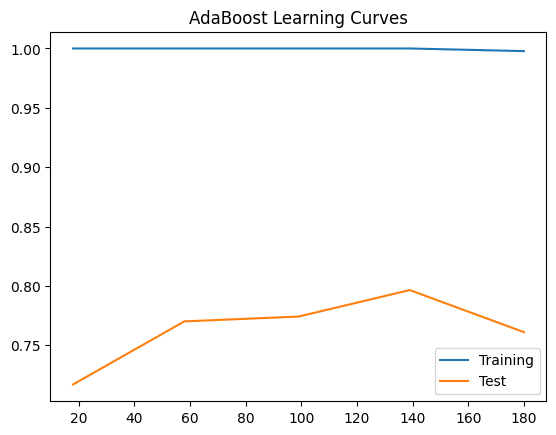

In [ ]:
# mendefinisikan model
#AdaBoost = AdaBoostClassifier(n_estimators=100)

# cross validation
AdaBoost_crossval = cross_val_score(adb, X_train, y_train, cv=5)
print(f"Ada Boost cross-validation scores: {AdaBoost_crossval}")
print(f"AdaBoost mean cross-validation scores: {np.mean(AdaBoost_crossval)}")

# learning curves
train_sizes, train_scores, test_scores = learning_curve(adb, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title('AdaBoost Learning Curves')
plt.legend()
plt.show()

***
**Random Forest**
***

Random Forest cross-validation scores: [0.7826087  0.77777778 0.82222222 0.82222222 0.77777778]
Random Forest mean cross-validation scores: 0.7965217391304348


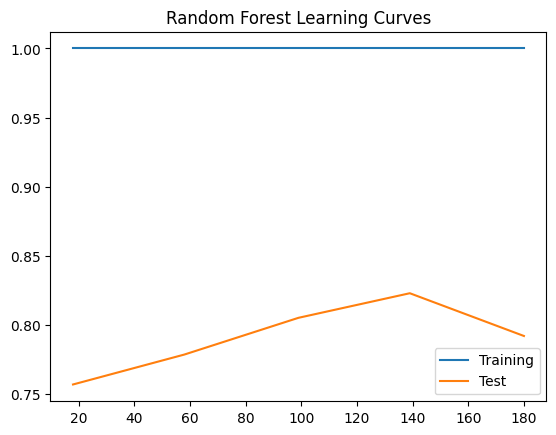

In [ ]:
# mendefinisikan model
#Random_Forest = RandomForestClassifier(n_estimators=100)

# cross validation
rf_crossval = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Random Forest cross-validation scores: {rf_crossval}")
print(f"Random Forest mean cross-validation scores: {np.mean(rf_crossval)}")

# learning curves
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title('Random Forest Learning Curves')
plt.legend()
plt.show()


***
**SVM**
***

SVM cross-validation scores: [0.82608696 0.84444444 0.77777778 0.82222222 0.77777778]
SVM mean cross-validation scores: 0.8096618357487924


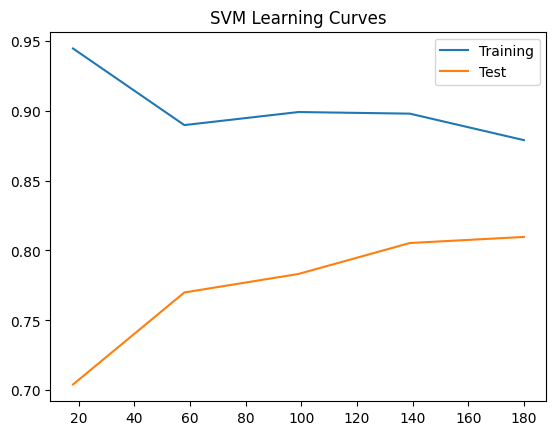

In [ ]:
# mendefinisikan model
#SVM = SVC()

# cross validation
svm_crossval = cross_val_score(svm, X_train, y_train, cv=5)
print(f"SVM cross-validation scores: {svm_crossval}")
print(f"SVM mean cross-validation scores: {np.mean(svm_crossval)}")

# learning curves
train_sizes, train_scores, test_scores = learning_curve(svm, X_train, y_train, cv=5)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test")
plt.title('SVM Learning Curves')
plt.legend()
plt.show()

In [ ]:
# overview cross-validation
df_crossval = pd.DataFrame({
    "Model": ["Logistic Regression", "KNN", "Decision Tree", "AdaBoost", "Random Forest", "SVM"],
    "Mean of accuracy": [np.mean(lr_crossval), np.mean(knn_crossval), np.mean(dt_crossval), np.mean(AdaBoost_crossval),np.mean(rf_crossval), np.mean(svm_crossval)],
    "Score of accuracy": [lr_crossval, knn_crossval, dt_crossval, AdaBoost_crossval, rf_crossval, svm_crossval],
    "Std of accuracy": [np.std(lr_crossval), np.std(knn_crossval), np.std(dt_crossval), np.std(AdaBoost_crossval),np.std(rf_crossval), np.std(svm_crossval)]
})

param_before_tuning = df_crossval.copy()
param_before_tuning

,Model,Mean of accuracy,Score of accuracy,Std of accuracy
0,Logistic Regression,0.783285,"[0.7608695652173914, 0.7777777777777778, 0.866...",0.044745
1,KNN,0.752367,"[0.717391304347826, 0.7555555555555555, 0.7111...",0.034206
2,Decision Tree,0.792077,"[0.782608695652174, 0.8888888888888888, 0.7555...",0.060432
3,AdaBoost,0.752174,"[0.7608695652173914, 0.7777777777777778, 0.777...",0.026183
4,Random Forest,0.814203,"[0.8043478260869565, 0.8, 0.8222222222222222, ...",0.009917
5,SVM,0.809662,"[0.8260869565217391, 0.8444444444444444, 0.777...",0.027095


### Hyperparameter Tuning

In [ ]:
# parameter distribution

# Logistic Regression
param_dist_lr = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2"],
    "solver": ["lbfgs", "newton-cg"],
    "max_iter": [100, 200, 300],
    "tol": [1e-3, 1e-4, 1e-5],
}

# KNN
param_dist_knn = {
    "n_neighbors": np.arange(1, 21),
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"]
}

# Decision Tree
param_dist_dt = {
    'max_depth': [3, 5, 10, 14],
    'min_samples_split': [2, 5, 10, 3, 4, 8],
    'criterion': ['gini', 'entropy']
}

param_dist_AdaBoost = {
    "n_estimators": np.arange(50, 501, 50),
    "learning_rate": np.arange(0.1, 1.1, 0.1)
}

# Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 150, 80],
    'max_depth': [3, 5, 10, 14, 16],
    'min_samples_split': [2, 5, 10, 3, 17],
    'criterion': ['gini', 'entropy']
}

# SVM
param_dist_svm = {
    "C": np.logspace(-4, 4, 5),
    "kernel": ["linear", "rbf"],
    "gamma": np.logspace(-3, 3, 5)
}

In [ ]:
# RandomizedSearchCV - Logistic Regression
random_search_lr = RandomizedSearchCV(estimator=Logistic_Regression, param_distributions=param_dist_lr, n_iter=100, cv=5, random_state=0)
random_search_lr.fit(X, y)

print("Best parameters for Logistic Regression:", random_search_lr.best_params_)
print("Best accuracy score for Logistic Regression:", random_search_lr.best_score_)

Best parameters for Logistic Regression: {'tol': 0.0001, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200, 'C': 0.03359818286283781}
Best accuracy score for Logistic Regression: 0.8162280701754387


In [ ]:
# RandomizedSearchCV - KNN
random_search_knn = RandomizedSearchCV(estimator=KNN, param_distributions=param_dist_knn, n_iter=100, cv=5, random_state=0)
random_search_knn.fit(X, y)

print("Best parameters for KNN:", random_search_knn.best_params_)
print("Best accuracy score for KNN:", random_search_knn.best_score_)

Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 10, 'algorithm': 'ball_tree'}
Best accuracy score for KNN: 0.7880325814536342


In [ ]:
# RandomizedSearchCV - Decision Tree
random_search_dt = RandomizedSearchCV(estimator=Decision_Tree, param_distributions=param_dist_dt, n_iter=100, cv=5, random_state=0)
random_search_dt.fit(X, y)

print("Best parameters for Decision Tree:", random_search_dt.best_params_)
print("Best accuracy score for Decision Tree:", random_search_dt.best_score_)

Best parameters for Decision Tree: {'min_samples_split': 2, 'max_depth': 3, 'criterion': 'entropy'}
Best accuracy score for Decision Tree: 0.7881578947368422


In [ ]:
# RandomizedSearchCV - AdaBoost
random_search_adb = RandomizedSearchCV(estimator=AdaBoost, param_distributions=param_dist_AdaBoost, n_iter=100, cv=5, random_state=0)
random_search_adb.fit(X, y)

print("Best parameters for AdaBoost:", random_search_adb.best_params_)
print("Best accuracy score for AdaBoost:", random_search_adb.best_score_)

Best parameters for AdaBoost: {'n_estimators': 50, 'learning_rate': 0.1}
Best accuracy score for AdaBoost: 0.8478070175438596


In [ ]:
# RandomizedSearchCV - Random Forest
random_search_rf = RandomizedSearchCV(estimator=Random_Forest, param_distributions=param_dist_rf, n_iter=100, cv=5, random_state=0)
random_search_rf.fit(X, y)

print("\nBest parameters for Random Forest:", random_search_rf.best_params_)
print("Best accuracy score for Random Forest:", random_search_rf.best_score_)


Best parameters for Random Forest: {'n_estimators': 80, 'min_samples_split': 2, 'max_depth': 14, 'criterion': 'entropy'}
Best accuracy score for Random Forest: 0.8514411027568922


In [ ]:
# RandomizedSearchCV - SVM
random_search_svm = RandomizedSearchCV(estimator=SVM, param_distributions=param_dist_svm, n_iter=100, cv=5, random_state=0)
random_search_svm.fit(X, y)

print("Best parameters for SVM:", random_search_svm.best_params_)
print("Best accuracy score for SVM:", random_search_svm.best_score_)

Best parameters for SVM: {'kernel': 'rbf', 'gamma': 0.03162277660168379, 'C': 100.0}
Best accuracy score for SVM: 0.8268170426065161


In [ ]:
# Remodeling hyperparameter tuning
logistic_regression_model_tuned = LogisticRegression(**random_search_lr.best_params_)
knn_model_tuned = KNeighborsClassifier(**random_search_knn.best_params_)
decision_tree_model_tuned = DecisionTreeClassifier(**random_search_dt.best_params_)
adaboost_model_tuned = AdaBoostClassifier(**random_search_adb.best_params_)
random_forest_model_tuned = RandomForestClassifier(**random_search_rf.best_params_)
svm_model_tuned = SVC(**random_search_svm.best_params_)

evaluation_results_tuned = {'Model Name': [], 'Mean of Accuracy': [], 'Score of Accuracy': [], 'Std of Accuracy': []}

for model_name, model in {"Logistic Regression" : logistic_regression_model_tuned, "KNN" : knn_model_tuned, "Decision Tree" : decision_tree_model_tuned, "AdaBoost" : adaboost_model_tuned, "Random Forest" : random_forest_model_tuned, "SVM" : svm_model_tuned}.items():
    scores = cross_val_score(model, X, y, cv=5)

    evaluation_results_tuned['Model Name'].append(model_name)
    evaluation_results_tuned['Mean of Accuracy'].append(np.mean(scores))
    evaluation_results_tuned['Score of Accuracy'].append(scores)
    evaluation_results_tuned['Std of Accuracy'].append(np.std(scores))

evaluation_df_tuned = pd.DataFrame(evaluation_results_tuned)

param_after_tuning = pd.DataFrame(data=evaluation_results_tuned)
print('After tunning:')
param_after_tuning

After tunning:


,Model Name,Mean of Accuracy,Score of Accuracy,Std of Accuracy
0,Logistic Regression,0.816228,"[0.7719298245614035, 0.8070175438596491, 0.877...",0.034500
1,KNN,0.788033,"[0.7543859649122807, 0.7543859649122807, 0.842...",0.043038
2,Decision Tree,0.788158,"[0.7368421052631579, 0.8421052631578947, 0.736...",0.043638
3,AdaBoost,0.847807,"[0.8070175438596491, 0.8596491228070176, 0.947...",0.053608
4,Random Forest,0.833835,"[0.8245614035087719, 0.8245614035087719, 0.877...",0.021724
5,SVM,0.826817,"[0.8596491228070176, 0.7894736842105263, 0.842...",0.023513


In [ ]:
print('Before tunning:')
param_before_tuning

Before tunning:


,Model,Mean of accuracy,Score of accuracy,Std of accuracy
0,Logistic Regression,0.783285,"[0.7608695652173914, 0.7777777777777778, 0.866...",0.044745
1,KNN,0.752367,"[0.717391304347826, 0.7555555555555555, 0.7111...",0.034206
2,Decision Tree,0.792077,"[0.782608695652174, 0.8888888888888888, 0.7555...",0.060432
3,AdaBoost,0.752174,"[0.7608695652173914, 0.7777777777777778, 0.777...",0.026183
4,Random Forest,0.814203,"[0.8043478260869565, 0.8, 0.8222222222222222, ...",0.009917
5,SVM,0.809662,"[0.8260869565217391, 0.8444444444444444, 0.777...",0.027095


### Bootstrapping

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
}

results = {}

for model_name, model in models.items():
    predictions = []
    n_estimators = 100

    for _ in range(n_estimators):
        X_boot, y_boot = resample(X_train, y_train, random_state=np.random.randint(100))
        model.fit(X_boot, y_boot)
        y_pred = model.predict(X_test)
        predictions.append(y_pred)

    final_predictions = np.mean(predictions, axis=0)

    # Threshold prediksi untuk nilai biner
    threshold = 0.5
    final_predictions_binary = [1 if pred > threshold else 0 for pred in final_predictions]
    accuracy = accuracy_score(y_test, final_predictions_binary)
    results[model_name] = {"accuracy": accuracy, "predictions": final_predictions_binary}

evaluation_results = {'Model Name': [], 'Mean of Accuracy': []}

for model_name, result in results.items():
    # Store mean accuracy
    evaluation_results['Model Name'].append(model_name)
    evaluation_results['Mean of Accuracy'].append(result['accuracy'])

evaluation_df = pd.DataFrame(evaluation_results)
evaluation_df


,Model Name,Mean of Accuracy
0,Logistic Regression,0.859649
1,KNN,0.824561
2,SVM,0.824561
3,AdaBoost,0.824561
4,Decision Tree,0.807018
5,Random Forest,0.842105


In [ ]:
# Score sebelum bootstrapping
print('before bootstrapping:')
param_after_tuning

before bootstrapping:


,Model Name,Mean of Accuracy,Score of Accuracy,Std of Accuracy
0,Logistic Regression,0.816228,"[0.7719298245614035, 0.8070175438596491, 0.877...",0.034500
1,KNN,0.788033,"[0.7543859649122807, 0.7543859649122807, 0.842...",0.043038
2,Decision Tree,0.788158,"[0.7368421052631579, 0.8421052631578947, 0.736...",0.043638
3,AdaBoost,0.847807,"[0.8070175438596491, 0.8596491228070176, 0.947...",0.053608
4,Random Forest,0.833835,"[0.8245614035087719, 0.8245614035087719, 0.877...",0.021724
5,SVM,0.826817,"[0.8596491228070176, 0.7894736842105263, 0.842...",0.023513


### Evaluation Metric

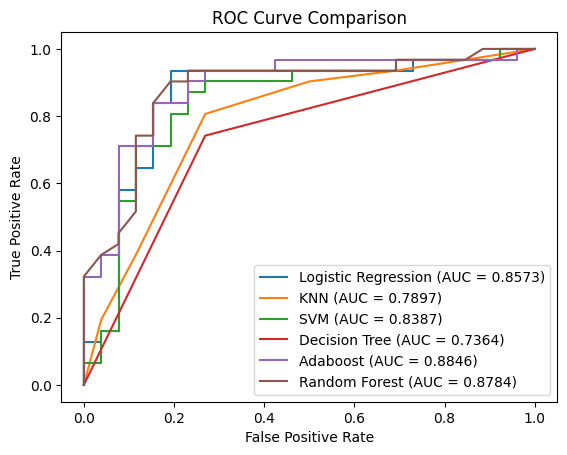

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model_name, model, X_test, y_test):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # mendefinisikan metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Adaboost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    plot_roc_curve(model_name, model, X_test, y_test)

plt.show()

- Peserta dapat mengevaluasi hasil dari machine learning model yang dibuat menggunakan **metric evaluation** yang sesuai. kasih alasan knp pilih machine learning itu, trus dijelaskan/diinterpretasikan

buat nambah akurasi bisa pake feature engineering, feature importance itu buat nentuin feature mana yg memiliki impact besar buat akurasinya

learnning curve -> hyperparammeter tuning -> bootstrap